In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import plotly.figure_factory as ff
import pydotplus
from scipy.stats import zscore
import sklearn.metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn import datasets,cluster,metrics,ensemble
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection,tree
from sklearn import preprocessing,decomposition,model_selection
from sklearn import feature_selection as fs
from mlxtend import plotting
from sklearn.datasets import make_classification
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/大數據的colab/winequality-red.csv")
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#這邊定義0是較劣質的酒 1是品質優良的酒
#以品質界定6.5為界 以上為優良 以下為劣質
data['quality'] =np.where(data['quality']>6.5,1,0)
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [ ]:
#分割訓練和預測的因素
X = data.drop('quality',axis=1)
y = data['quality']

In [ ]:
Xz=X.apply(zscore)

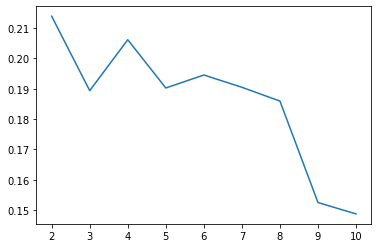

In [ ]:
silhouette_avg = []
for i in range(2,11):
    kmeans_fit=KMeans(n_clusters=i).fit(Xz)
    silhouette_avg.append(silhouette_score(Xz,kmeans_fit.labels_))
plt.plot(range(2,11),silhouette_avg)

In [ ]:
km=KMeans(n_clusters=2,n_init=15,random_state=3)
km.fit(Xz)
km.labels_
metrics.silhouette_score(Xz,km.labels_)

0.21372996335506225